# Covid-19 Vignette
### ISE 535 Final Project by Jeremias A. Endrina Jr.

## Introduction:

As a Statistics teacher, I often require my students to come-up with a final project applying what they learned in class. My school offers AP Computer Science where some of my students are taking or have taken such class. It would be interesting to collaborate with the teacher of this computer science course and integrate both our courses by requiring our students to come-up with a final project with coding using Python and Statistics in it. Thus, this project will be a good example for our students to follow.

This project will use data from [Covid-19 API](https://covid19api.com/). All data are queried as json files which are then converted into dataframes with the help of different functions. Next, exploratory data analysis will be conducted through tables and visualitions to check for patterns, similarities and differences. After which, future predictions or forecasting using machine learning will be employed. Due to computational limitations, we will limit our analyssis to South East Asian countries. This can easily be extended to more countries if the user desired to do so.

The best feature of this project is that the results are always recent. Since the data used in this project is dependent on the API, then once the API is updated and we run the codes in this project then we can be assured that the results are up to date. 

## Python Packages

Below are the packages that will be used in this vignette.

In [361]:
import numpy as np                   #to work with arrays    
import pandas as pd                  #to work with dataframes
import requests                      #to query with covid-1 API
import plotly.express as px          #to produce pretty plots
import plotly.graph_objs as go       #to produce pretty plots
import datetime                      #to work with time values
from datetime import datetime        #to work with time values
import warnings                      #to hide unnecessary warnings
warnings.simplefilter('ignore')
warnings.filterwarnings('ignore')

from ipywidgets import interact, IntSlider, interactive, widgets, interact_manual, fixed
from pandas import DataFrame
from fbprophet import Prophet

pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)

pd.options.display.float_format = "{:.2f}".format
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

from IPython.display import display, HTML
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Functions


#### 1. List of Countries with Covid-19 Data
The API is dependent on the reports submitted by participating countries. We will create `countries()` countries that will return a list of countries that have possibly Covid-19 data available. Note: After careful explorations, some countries in the list have incomplete data. 

In [362]:
def countries():
    url = "https://api.covid19api.com/countries"                          #url to be queried
    payload = {}                                                          #a function required by Covid-19 API
    headers = {'X-Access-Token':'a3c98472-2928-4752-9d71-083ce072213c'}   #subscription code ($10 monthly for access.)
    response = requests.request("GET", url, headers=headers, data=payload)#query request 
    data = response.json()                                                #convert query to json format
    df = DataFrame(data).sort_values(by='Country')                        #convert json file to dataframe
    return df

#### 2. Generate All Data of a Country
This `countryData()` function will query all data since the first covid case of the country being specified. We can refer to the list of countries below that have possibly Covid-19 data.

In [363]:
def countryData(country):
    url1 = "https://api.covid19api.com/dayone/country/"                   #base url to be queried
    country = country
    url = url1+country                                                    #complete url to be queried
    payload={}
    headers = {'X-Access-Token': 'a3c98472-2928-4752-9d71-083ce072213c'}
    response = requests.request("GET", url, headers=headers, data=payload)
    data = response.json()
    df = DataFrame(data)
    return df

#### 3. Generate Latest Data of a Country
This `latestCountry()` function will generate the current data (usually yesterday's data) of the country specified. If the API is updated and we run this function, then we will get the latest data of that country.

In [364]:
def latestCountry(country):
    url1 = "https://api.covid19api.com/dayone/country/"
    country = country
    url = url1+country
    payload={}
    headers = {'X-Access-Token': 'a3c98472-2928-4752-9d71-083ce072213c'}
    response = requests.request("GET", url, headers=headers, data=payload)
    data = response.json()
    df = DataFrame(data)
    return df.tail(1)                                                      #return the most current data

## Data Generation and  Wrangling 
Now that we have functions that would help us query data from the Covid-19 API, then we are ready to generate all that we want and do some data wrangling such as creating new variables, converting date column to something useful in data series analysis and etc.

#### 1. List of Countries that have Covid-19 Data from the API
If we run the `countries()` function, it will return a dataframe of countries that have possibly Covid-19 data. Note though that not all countries have continued to report their cases. 

In [365]:
dfCountries = countries()                                                 #no argument is needed in this function
dfCountries

,Country,Slug,ISO2
107,ALA Aland Islands,ala-aland-islands,AX
41,Afghanistan,afghanistan,AF
83,Albania,albania,AL
64,Algeria,algeria,DZ
214,American Samoa,american-samoa,AS
6,Andorra,andorra,AD
2,Angola,angola,AO
238,Anguilla,anguilla,AI
99,Antarctica,antarctica,AQ
74,Antigua and Barbuda,antigua-and-barbuda,AG


#### 2. Latest Cases for South East Asian Countries

In [366]:
seCountries = ["brunei","myanmar","cambodia","timor-leste","indonesia","malaysia", 
               "philippines","singapore","thailand","vietnam"]
dataSE = []

for country in seCountries:
    df = latestCountry(country)
    columns = list(df)
    values = df.iloc[0]
    zipped = zip(columns, values)
    a_dictionary = dict(zipped)
    dataSE.append(a_dictionary)

dataSE = DataFrame(dataSE).sort_values('Country')
dataSE['Lat'] = pd.to_numeric(dataSE['Lat'])
dataSE['Lon'] = pd.to_numeric(dataSE['Lon'])
dataSE['Date'] = pd.to_datetime(dataSE.Date, format='%Y-%m-%d %H:%M:%S')
dataSE['Date'] = dataSE['Date'].dt.strftime('%Y-%m-%d')

dataSE.head()

,ID,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
0,cd8006a9-a439-478c-8d9e-213542d6b8ff,Brunei Darussalam,BN,,,,4.54,114.73,13545,91,0,13454,2021-11-06
2,7af14285-f018-4a56-8f4e-f4741cd44722,Cambodia,KH,,,,12.57,104.99,118948,2818,0,116130,2021-11-06
4,c4c4892b-984c-4c02-9ed4-a7aa30bf248b,Indonesia,ID,,,,-0.79,113.92,4247320,143519,0,4103801,2021-11-06
5,79292594-a5b2-4b7b-92f4-5d6de4eaa4af,Malaysia,MY,,,,4.21,101.98,2497265,29202,0,2468063,2021-11-05
1,2a6fefdd-a173-4d52-9cd1-90808e32823e,Myanmar,MM,,,,21.91,95.96,505038,18783,0,486255,2021-11-06


#### 3. All Data for All South East Asian Countries

In [367]:
bigData = []
for country in seCountries:
    df = countryData(country)
    bigData.append(df)
bigData = pd.concat(bigData)

#cleaning and filtering for widgets use
bigData = bigData[['Country', 'CountryCode','Confirmed','Deaths','Recovered','Active','Date']]
bigData['Date'] = pd.to_datetime(bigData.Date, format='%Y-%m-%d %H:%M:%S')
bigData['Date'] = bigData['Date'].dt.strftime('%Y-%m-%d')
bigData['Date']= pd.to_datetime(bigData["Date"])
bigData = bigData.reset_index(drop=True)

## Visualizations with Widgets

#### 1. Widgets

In [368]:
layout = widgets.Layout(width='300px', height='30px')
countryFC = widgets.Text(
    value='Philippines',
    placeholder='Philippines',
    description='Type-in Country:',
    layout=layout,
    disabled=False,
    style= {'description_width': 'initial'}
)

varFC = widgets.RadioButtons(
    options=['Confirmed', 'Deaths', 'DailyCases', 'DailyDeaths'],
    value='DailyCases',
    description='Click Variable:',
    disabled=False,
    style= {'description_width': 'initial'}
)

daysFC = widgets.Dropdown(
    options=['7', '14', '30', '60'],
    value='7',
    description='Days to Predict:',
    disabled=False,
    style= {'description_width': 'initial'}
)

variableSel = widgets.RadioButtons(
    options=['Confirmed', 'Deaths', 'Active'],
    value='Confirmed',
    description='Variable:',
    disabled=False
)

countrySel = widgets.Dropdown(
    options=['Brunei Darussalam', 'Cambodia', 'Indonesia','Malaysia','Myanmar',
            'Philippines', 'Singapore', 'Thailand', 'Timor-Leste','Viet Nam'],
    value='Brunei Darussalam',
    description='Country:',
    disabled=False,
)

variableSel = widgets.Dropdown(
    options=['Confirmed', 'Deaths', 'Recovered', 'Active'],
    value='Confirmed',
    description='Variable:',
    disabled=False
)

#Dates entered are exclusive
import datetime
start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2021, 12, 30)
startDateSel = widgets.DatePicker(description='Start Date:', disabled=False, value=start)
endDateSel = widgets.DatePicker(description='End Date:', disabled=False, value=end)

#### 2. Table of Latest Cases

In [369]:
#how to select columns and highlight dataframe using gradient background
dataFilter = dataSE[['Country','Confirmed','Deaths', 'Active']]
dataFilter = dataFilter.sort_values('Confirmed', ascending=False).reset_index(drop=True)
dataFilter.style.background_gradient(cmap='Reds')

,Country,Confirmed,Deaths,Active
0,Indonesia,4247320,143519,4103801
1,Philippines,2797986,44085,2753901
2,Malaysia,2497265,29202,2468063
3,Thailand,1951572,19542,1932030
4,Viet Nam,953547,22412,931135
5,Myanmar,505038,18783,486255
6,Singapore,212745,468,212277
7,Cambodia,118948,2818,116130
8,Timor-Leste,19795,122,19673
9,Brunei Darussalam,13545,91,13454


#### 3. Five Number Summaries of Cases

#### 4. Scatter Plot of Latest Cases per Country

In [370]:
def scatterLatest(variable):
    fig = px.scatter(dataSE, x='Country', y=variable, size=variable,
                color='Country', hover_name='Country', size_max=50,
                title=f"Latest Covid-19 {variable} Cases as of {dataSE['Date'][0]}")
    return fig.show()

interact(scatterLatest,variable=variableSel)

interactive(children=(Dropdown(description='Variable:', options=('Confirmed', 'Deaths', 'Recovered', 'Active')…

<function __main__.scatterLatest(variable)>

#### 5. Density Map of Latest Cases per County

In [371]:
def denseMap(variable): 
    fig = px.density_mapbox(dataSE, lat = 'Lat', lon = 'Lon', hover_name = 'Country',
                       hover_data = [variable], color_continuous_scale='RdBu',
                            radius=50, zoom=3, height=600, z=variable)
    fig.update_layout(title = f"Latest Covid-19 {variable} Cases as of {dataSE['Date'][0]}",
                 mapbox_style = 'open-street-map', mapbox_center_lon = 114)
    return fig.show()

interact(denseMap,variable=variableSel)

interactive(children=(Dropdown(description='Variable:', options=('Confirmed', 'Deaths', 'Recovered', 'Active')…

<function __main__.denseMap(variable)>

#### 6. Plot of Timeseries Cases per Country

In [372]:
def filter(country, variable, startDate, endDate):
    filter1 = bigData[bigData['Country'] == countrySel.value]
    filter2 = filter1[['Country', 'CountryCode', variableSel.value, 'Date']]
    filter3 = filter2[(filter2['Date']>pd.to_datetime(startDateSel.value)) & 
                   (filter2['Date']<pd.to_datetime(endDateSel.value))]
    fig = px.line(filter3, x='Date', y=[variable],
                 title=f"Covid-19 {variable} Cases of {country}")
    return display(filter3.head()), fig.show()

widget = interact(filter, country=countrySel, variable=variableSel, startDate=startDateSel, endDate=endDateSel)

interactive(children=(Dropdown(description='Country:', options=('Brunei Darussalam', 'Cambodia', 'Indonesia', …

### Forecasting

#### Step 1: Run the code then type-in the country to be forecasted.

In [373]:
countryFC

Text(value='Philippines', description='Type-in Country:', layout=Layout(height='30px', width='300px'), placeho…

#### Step 2: Run the code then select the variable to be forecasted.

In [374]:
varFC

RadioButtons(description='Click Variable:', index=2, options=('Confirmed', 'Deaths', 'DailyCases', 'DailyDeath…

#### Step 3: Run the code then choose number of days to predict.

In [375]:
daysFC

Dropdown(description='Days to Predict:', options=('7', '14', '30', '60'), style=DescriptionStyle(description_w…

#### Step 4: Run code to generate data from Covid API.

In [376]:
data = countryData(countryFC.value)
data = data.iloc[:-1 , :]

#Create daily cases
data['DailyCases'] = data['Confirmed'].diff()
data = data.dropna()
data['DailyCases'] = data['DailyCases'].astype(int)

#Create daily deaths
data['DailyDeaths'] = data['Deaths'].diff()
data = data.dropna()
data['DailyDeaths'] = data['DailyDeaths'].astype(int)

#show tail of data
data.tail()

,ID,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date,DailyCases,DailyDeaths
641,91d4b7e4-9c07-4c06-90e4-cb9e8f00979a,Philippines,PH,,,,12.88,121.77,2790375,43276,0,2747099,2021-11-01T00:00:00Z,3099,104
642,67e476c2-557b-4c80-8566-0ea144c49257,Philippines,PH,,,,12.88,121.77,2792656,43404,0,2749252,2021-11-02T00:00:00Z,2281,128
643,90dfbc2c-1928-4fc6-b1a7-a0038c3eb116,Philippines,PH,,,,12.88,121.77,2793898,43586,0,2750312,2021-11-03T00:00:00Z,1242,182
644,5dba1c5a-22be-4401-bac5-42da188cc4da,Philippines,PH,,,,12.88,121.77,2795642,43825,0,2751817,2021-11-04T00:00:00Z,1744,239
645,25b972f7-9114-4e35-8474-e405455b4526,Philippines,PH,,,,12.88,121.77,2797986,44085,0,2753901,2021-11-05T00:00:00Z,2344,260


#### Step 5: Run code to calculate Quantitative Summaries of the Variable

In [377]:
table = data[varFC.value].describe().to_frame()
display(HTML(table.to_html()))

,DailyCases
count,644.00
mean,4344.70
std,5008.87
min,0.00
25%,993.50
50%,2236.50
75%,6181.75
max,27887.00


#### Step 6: Run code to plot data timeseries.

In [378]:
fig = px.line(data, x=data['Date'], y=data[varFC.value],
             title=f"Covid-19 {varFC.value} Cases of {countryFC.value}")
fig.show()

#### Step 6. Run code to forecast cases for the next few days using machine learning.

In [379]:
#prepare data
df = data[[varFC.value, 'Date']]
df['Date'] = pd.to_datetime(df.Date, format='%Y-%m-%d %H:%M:%S')
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')
df['Date']= pd.to_datetime(df["Date"])
df.columns = ['y', 'ds']

#fit model using Prophet
m = Prophet(interval_width=0.95, yearly_seasonality=True)
model = m.fit(df)

#generate predictions using model fit
future = m.make_future_dataframe(periods=int(daysFC.value), freq='D')
forecast = m.predict(future)

#print prediction of the next few days
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(int(daysFC.value))

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
644,2021-11-06,8638.42,4176.61,13285.78
645,2021-11-07,8454.30,3805.36,12852.70
646,2021-11-08,8322.87,3466.27,12725.54
647,2021-11-09,7858.18,3311.13,12519.04
648,2021-11-10,8083.73,3291.91,12808.98
649,2021-11-11,8680.17,4084.47,13498.26
650,2021-11-12,9602.48,5239.16,13936.33


#### Step 7: Run code to plot actual and predicted values with corresponding error bands.

In [380]:
fig = go.Figure([
    go.Scatter(
        name='Forecast',
        x=forecast['ds'],
        y=forecast['yhat'],
        mode='lines',
        line=dict(color='rgb(31, 119, 180)'),
    ),
    go.Scatter(
        name='Upper Bound',
        x=forecast['ds'],
        y=forecast['yhat_upper'],
        mode='lines',
        marker=dict(color="#444"),
        line=dict(width=1),
        showlegend=False
    ),
    go.Scatter(
        name='Lower Bound',
        x=forecast['ds'],
        y=forecast['yhat_lower'],
        marker=dict(color="#444"),
        line=dict(width=1),
        mode='lines',
        fillcolor='rgba(68, 68, 68, 0.3)',
        fill='tonexty',
        showlegend=False
    ),
    go.Scatter(
        x=df['ds'], 
        y = df['y'], 
        mode='markers', 
        name='Actual'
    )
])
fig.update_layout(
    yaxis_title=f'{varFC.value} Cases',
    title=f'Actual and Forecasted {varFC.value} Cases for {countryFC.value}',
    hovermode="x"
)
fig.show()

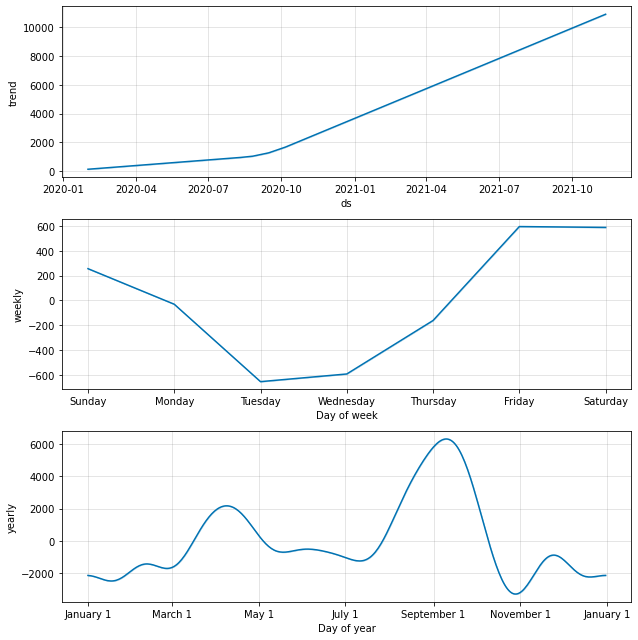

In [381]:
#There are built-in plots in the prophet package that can be used to understand trends.
plot2 = m.plot_components(forecast)

#### Step 7: Run code to test performance of model via cross validation.

In [382]:
#from prophet.diagnostics import cross_validation
#df_cv = cross_validation(m, initial='570 days', period='7 days', horizon = '30 days')

In [383]:
#from prophet.diagnostics import performance_metrics
#df_p = performance_metrics(df_cv)
#df_p.head()